# SERGAS data analysis - parameter region

Read file with data from the fits of the cases, dates to useir quenched model

scan in : beta, gamma, tr, ti, s1
fit  in : t0, phi

Select the best point, and print std in a region of (n = 3) sigmas

author: JAH, JJG

version: 15/07/20


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [2]:
import os
import sys
import glob
import time
import warnings
import datetime 
import matplotlib.dates as mdates
print("Last updated on ", time.asctime())

Last updated on  Wed Jul 15 17:31:06 2020


In [3]:
import numpy as np
import pandas as pd
import matplotlib
import time

import c19.useir      as us
import c19.useir_plot as usp

In [4]:
from c19.data_functions_HG import hg_get_data_ingresos, hg_get_data_pacientes, hg_get_data_age
from c19.HG_analysis import plot_hgi, plot_nh_nu, recovery_time, exitus_time, exitus_group, exitus, hosp_uci, select_age_by_CA_and_sex
from c19.HG_analysis import hist_XY_series, plot_XY_series, plot_pop_age
from c19.HG_analysis import formatter

In [5]:
datapath="/Users/hernando/investigacion/bio/c19/data/HospitalesGalicia"
file = "IngresosCovid.csv"
filep = "PacientesCOVID.csv"
ff =f'{datapath}/{file}'
fp =f'{datapath}/{filep}'
dfi = pd.read_csv(ff, sep='|')

In [6]:
def get_cases(df, index = 'ingreso'):
    nps = df.groupby([index]).pacienteID.count()
    sel = nps.index >= np.datetime64('2020-02-15')
    dates, cases = nps.index[sel].values, nps.values[sel]
    return dates, cases

def get_fun(ffit):
    fun   = us.chi2
    if ffit == 'mll' : fun = us.mll
    if ffit == 'emll': fun = us.emll
    return fun

def plt_kpars(dates, cases, kpars, fmodel, ffit = 'chi2'):
    pars  = us.kpars_to_pars(kpars, fmodel)
    usp.plt_data_model(dates, cases, pars, fmodel)
    fun = get_fun(ffit)
    ts  = us.to_ts(dates)
    fval  = fun(ts, cases, pars, fmodel)
    print('best pars ', kpars, ', chi2 ', fval)

In [7]:
hgi = hg_get_data_ingresos(ff)
dates, cases = get_cases(hgi)
sel = dates >= np.datetime64('2020-03-01') 
dates, cases = dates[sel], cases[sel]

## $\chi^2$ distribution

In [8]:
path  = "/Users/hernando/investigacion/bio/c19/data/"
ifile = "dms_scan_fit_120720.csv"
dpars = pd.read_csv(path + ifile)

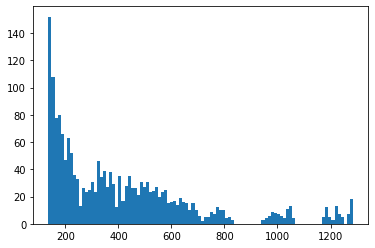

In [9]:
plt.hist(dpars.fval, 100);
v0 = np.min(dpars.fval)

## best point

In [10]:
fval0 = np.min(dpars.fval)
sel0  = dpars.fval == fval0
print('best point', dpars[sel0])

best point      beta        fval  gamma          n      phim     s1         t0    ti   tr
921   1.4  135.852087    0.2  2701743.0  0.089691  0.005  21.836081  4.75  3.0


In [11]:
sel = (dpars.fval <= v0 + 3.)
for name in dpars.columns:
    print(name, dpars[sel][name].mean(), dpars[sel][name].std())

beta 1.416346153846154 0.0669512215224518
fval 137.1406621880983 0.8115118743277315
gamma 0.20961538461538462 0.01989792958601358
n 2701743.0 0.0
phim 0.06263085292967191 0.019460269776597223
s1 0.007548076923076923 0.0020704731281422067
t0 23.759221870681156 1.6981287207644704
ti 4.764423076923077 0.24957543133810628
tr 2.9038461538461537 0.19897929586013585


## range of parameters

Select region in $\Delta \chi^2  \le 9$, consider average and standard deviation:

 * $\beta  = 1.416 \pm  0.067$
 * $\gamma = 0.21  \pm 0.02$
 * $\phi  =  0.06  \pm 0.02$ detected fraction of cases
 * $s1    = 0.75  \pm 0.21 $ fraction of galician population affected
 * $t_0   = 23.8  \pm  1.7 $ days from start of pandemic
 * $t_i   =  4.76 \pm  0.24 $ days of infection 
 * $t_r   = 2.90  \pm  0.2 $ days of removal

In [12]:
kpars = {'beta' : 1.416, 'gamma' : 0.21, 'phim' : 0.06, 's1' : 0.0075, 
         't0' :23.8, 'ti' : 4.76, 'tr' : 2.9, 'n' : 2701743.0}

best pars  {'beta': 1.416, 'gamma': 0.21, 'phim': 0.06, 's1': 0.0075, 't0': 23.8, 'ti': 4.76, 'tr': 2.9, 'n': 2701743.0} , chi2  143.00611447928102


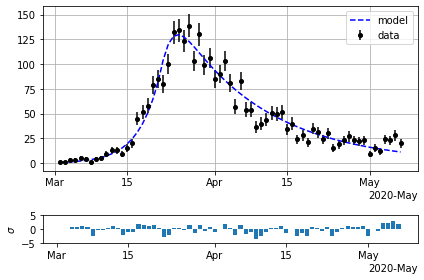

In [13]:
fmodel = us.dms_t0useirq_tr
plt_kpars(dates, cases, kpars, fmodel, ffit = 'chi2')